# Sales Analysis

Import Libraries

In [76]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Task 1: Merging 12 months of sales data into a single file

In [54]:
file_path = '/Users/christinamanara/Library/Mobile Documents/com~apple~CloudDocs/Data Science & Machine Learning/Personal Projects/Sales_Analysis-1/Sales_Data'
file_list = os.listdir(file_path)
file_list

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [55]:
df_append = pd.DataFrame()

#append all files into a csv
for file in file_list:
    df_tmp = pd.read_csv(file_path+'/'+file)
    df_append = df_append.append(df_tmp, ignore_index=True)
df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [56]:
count_row = df_append.shape[0]  # Gives number of rows
count_col = df_append.shape[1]  # Gives number of columns
print("Shape of the dataframe before cleaning:", count_row, count_col)

Shape of the dataframe before cleaning: 186850 6


#### Cleaning the dataframe!

In [57]:
df_append_nan = df_append[df_append.isna().any(axis=1)]
df_append_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Reset index after drop
df_append = df_append.dropna(how='all')
df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [59]:
count_row = df_append.shape[0]  # Gives number of rows
count_col = df_append.shape[1]  # Gives number of columns
print("Shape of the dataframe before cleaning:", count_row, count_col)

Shape of the dataframe before cleaning: 186305 6


#### Task 2: What was the best month for sale? How much was earned that month?

In [60]:
df_append['Date'] = pd.to_datetime(df_append['Order Date'], errors='coerce')
df_append['Date'] = df_append['Date'].dt.month
df_append['Date'] = df_append['Date'].astype('Int64')
df1 = df_append[['Date', 'Quantity Ordered', 'Price Each']]

<ipython-input-60-cd9ffa2e6c52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_append['Date'] = pd.to_datetime(df_append['Order Date'], errors='coerce')
<ipython-input-60-cd9ffa2e6c52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_append['Date'] = df_append['Date'].dt.month
<ipython-input-60-cd9ffa2e6c52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [61]:
df1

,Date,Quantity Ordered,Price Each
0,12,1,1700
1,12,1,600.0
2,12,1,11.95
3,12,1,149.99
4,12,1,11.95
...,...,...,...
186845,6,1,2.99
186846,6,1,149.99
186847,6,1,11.95
186848,6,1,11.95


In [63]:
df1['Quantity Ordered'] = pd.to_numeric(df1['Quantity Ordered'], errors='coerce')
df1['Price Each'] = pd.to_numeric(df1['Price Each'], errors='coerce')
df1['Date'] = df1['Date'].astype('Int64')
df1['Total Price'] = df1['Quantity Ordered'] * df1['Price Each']

<ipython-input-63-09bfbceece36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Quantity Ordered'] = pd.to_numeric(df1['Quantity Ordered'], errors='coerce')
<ipython-input-63-09bfbceece36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price Each'] = pd.to_numeric(df1['Price Each'], errors='coerce')
<ipython-input-63-09bfbceece36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [64]:
df1.head(20)

,Date,Quantity Ordered,Price Each,Total Price
0,12,1.0,1700.00,1700.00
1,12,1.0,600.00,600.00
2,12,1.0,11.95,11.95
3,12,1.0,149.99,149.99
4,12,1.0,11.95,11.95
5,12,1.0,3.84,3.84
6,12,1.0,11.95,11.95
7,12,2.0,11.95,23.90
8,12,1.0,99.99,99.99
9,12,4.0,2.99,11.96


In [65]:
# How many items ordered in December
df1.groupby('Date')['Quantity Ordered'].count().reset_index().max()

Date                   12
Quantity Ordered    24984
dtype: int64

In [70]:
df2 = df1.groupby('Date')['Total Price'].sum().reset_index().max()
df2.astype(int)

Date                12
Total Price    4613443
dtype: int64

In [73]:
df3 = df1.groupby('Date')['Total Price'].sum().reset_index()
df3

,Date,Total Price
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


Visualisation of results

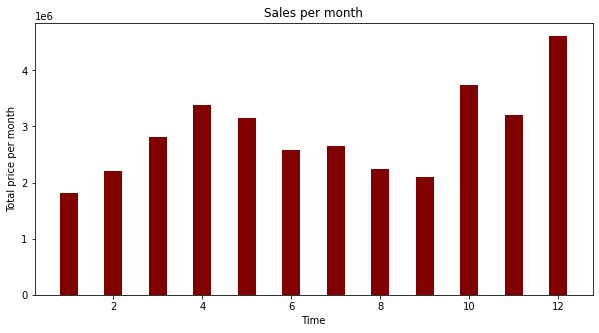

In [77]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df3['Date'], df3['Total Price'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Time")
plt.ylabel("Total price per month")
plt.title("Sales per month")
plt.show()

#### Task 3: What city had the highest number of sales?